In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
import os


train_path = r'/Users/sharvitkashikar/greenAI-Sem7/day-10/lab4/DATASET/TRAIN'
test_path = r'/Users/sharvitkashikar/greenAI-Sem7/day-10/lab4/DATASET/TEST'

In [3]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 12565/12565 [00:09<00:00, 1270.10it/s]


In [4]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

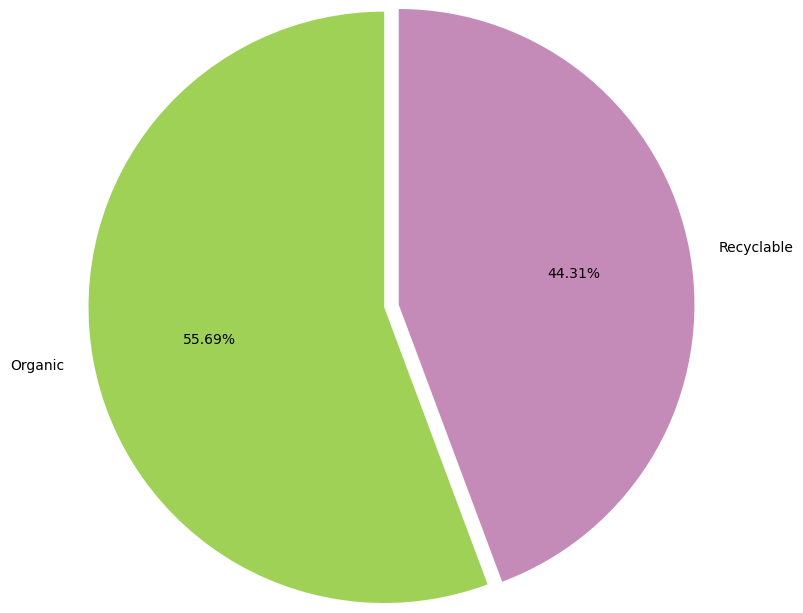

In [5]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), startangle=90, explode=[0.05,0.05], autopct='%0.2f%%',
    labels=['Organic', 'Recyclable'], colors= colors, radius=2)
plt.show()

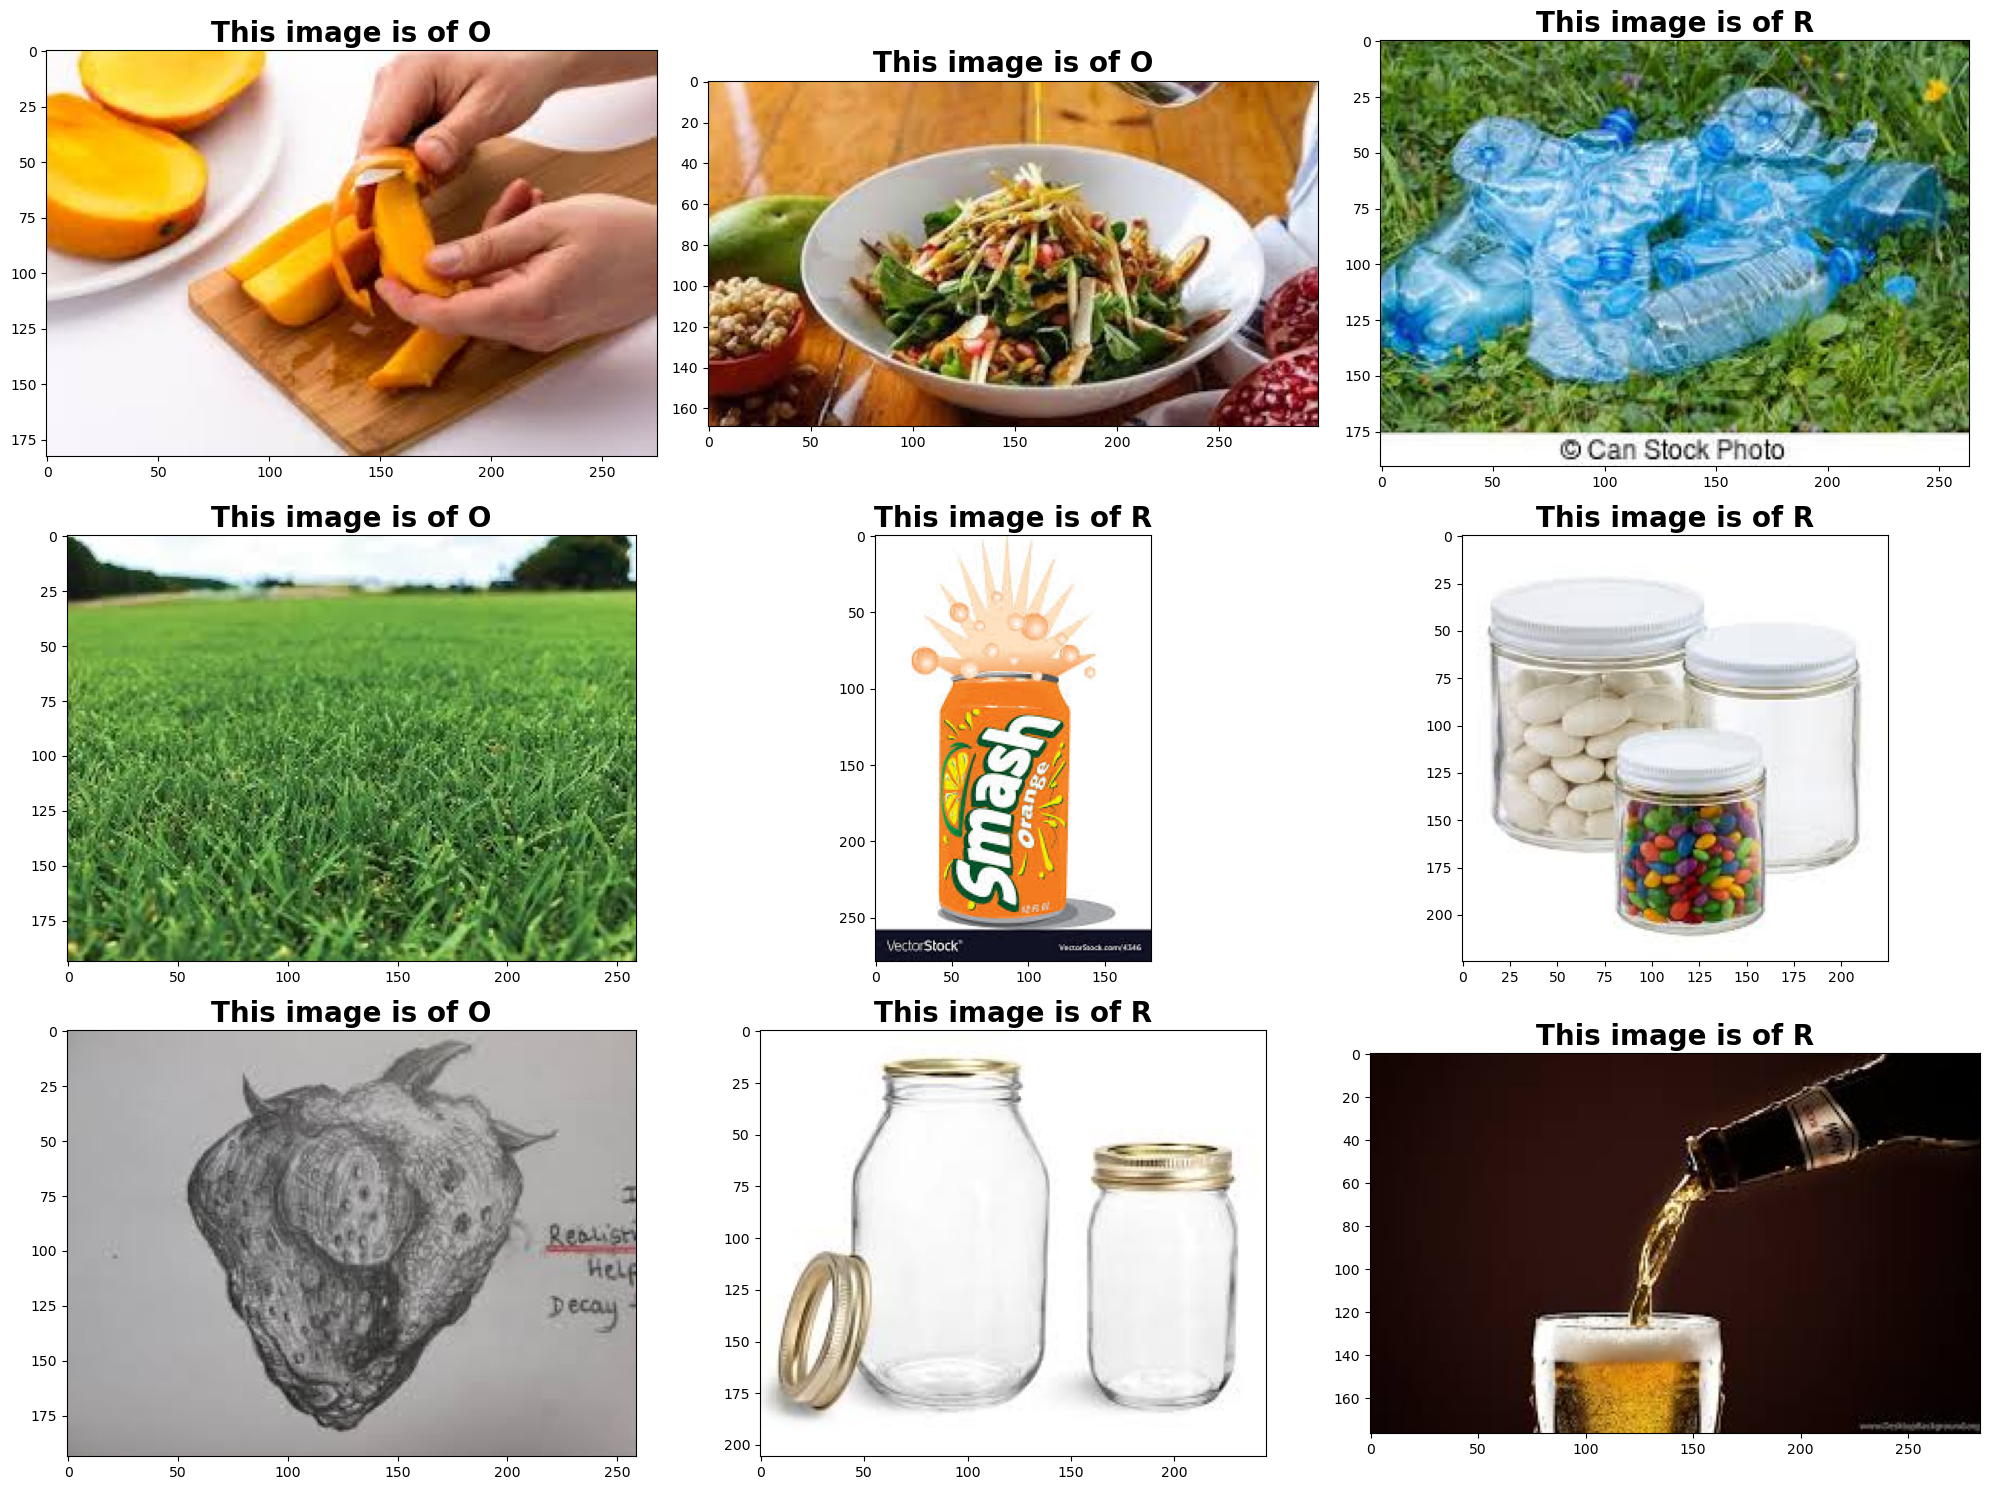

In [6]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    index = np.random.randint(len(data))
    plt.title(f'This image is of {data.label[index]}', fontdict={'size': 20, 'weight': 'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [7]:
className = glob (train_path + '/*')
numberOfClass = len(className)
print("Number Of Class: ", numberOfClass)

Number Of Class:  2


In [8]:
model = Sequential()


In [9]:
model.add(Conv2D (32, (3,3), input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D (64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

2025-06-17 12:50:11.719115: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-17 12:50:11.720288: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-17 12:50:11.721306: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-17 12:50:11.721630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-17 12:50:11.721645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

In [11]:
model.compile(loss = "categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])
batch_size = 32

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_datagen = ImageDataGenerator (rescale= 1./255)
test_datagen = ImageDataGenerator (rescale= 1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
train_path,
target_size= (224,224),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
test_path,
target_size= (224,224),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
train_generator,
# Pass the generator directly
epochs=10,
validation_data=test_generator
# Validation data generator
)

Epoch 1/10


2025-06-17 12:50:13.840566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-06-17 12:50:13.852457: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


219/706 ━━━━━━━━━━━━━━━━━━━━ 1:23 171ms/step - accuracy: 0.7324 - loss: 0.5931

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    class_labels = list(train_generator.class_indices.keys())
    print(f"This image -> {class_labels[result]}")

In [ ]:
test_img = cv2.imread("/Users/sharvitkashikar/greenAI-Sem7/day-10/lab4/DATASET/TEST/R/R_10000.jpg")
predict_func(test_img)